# bs4模块

- bs4是在爬取网页，解析页面使用比较多的技术之一。
- 使用这个模块，需要额外安装模块
    - 安装指令：'pip install bs4'
    
- bs4的帮助
    - 在python帮助环境下，使用import与help可以得到全部文档。

```shell

    Last login: Fri Mar 15 16:09:43 on ttys000
    localhost:~ yangqiang$ python
    Python 3.6.6 (v3.6.6:4cf1f54eb7, Jun 26 2018, 19:50:54) 
    [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)] on darwin
    Type "help", "copyright", "credits" or "license" for more information.
    >>> import bs4
    >>> help(bs4)

```

- 帮助截图
    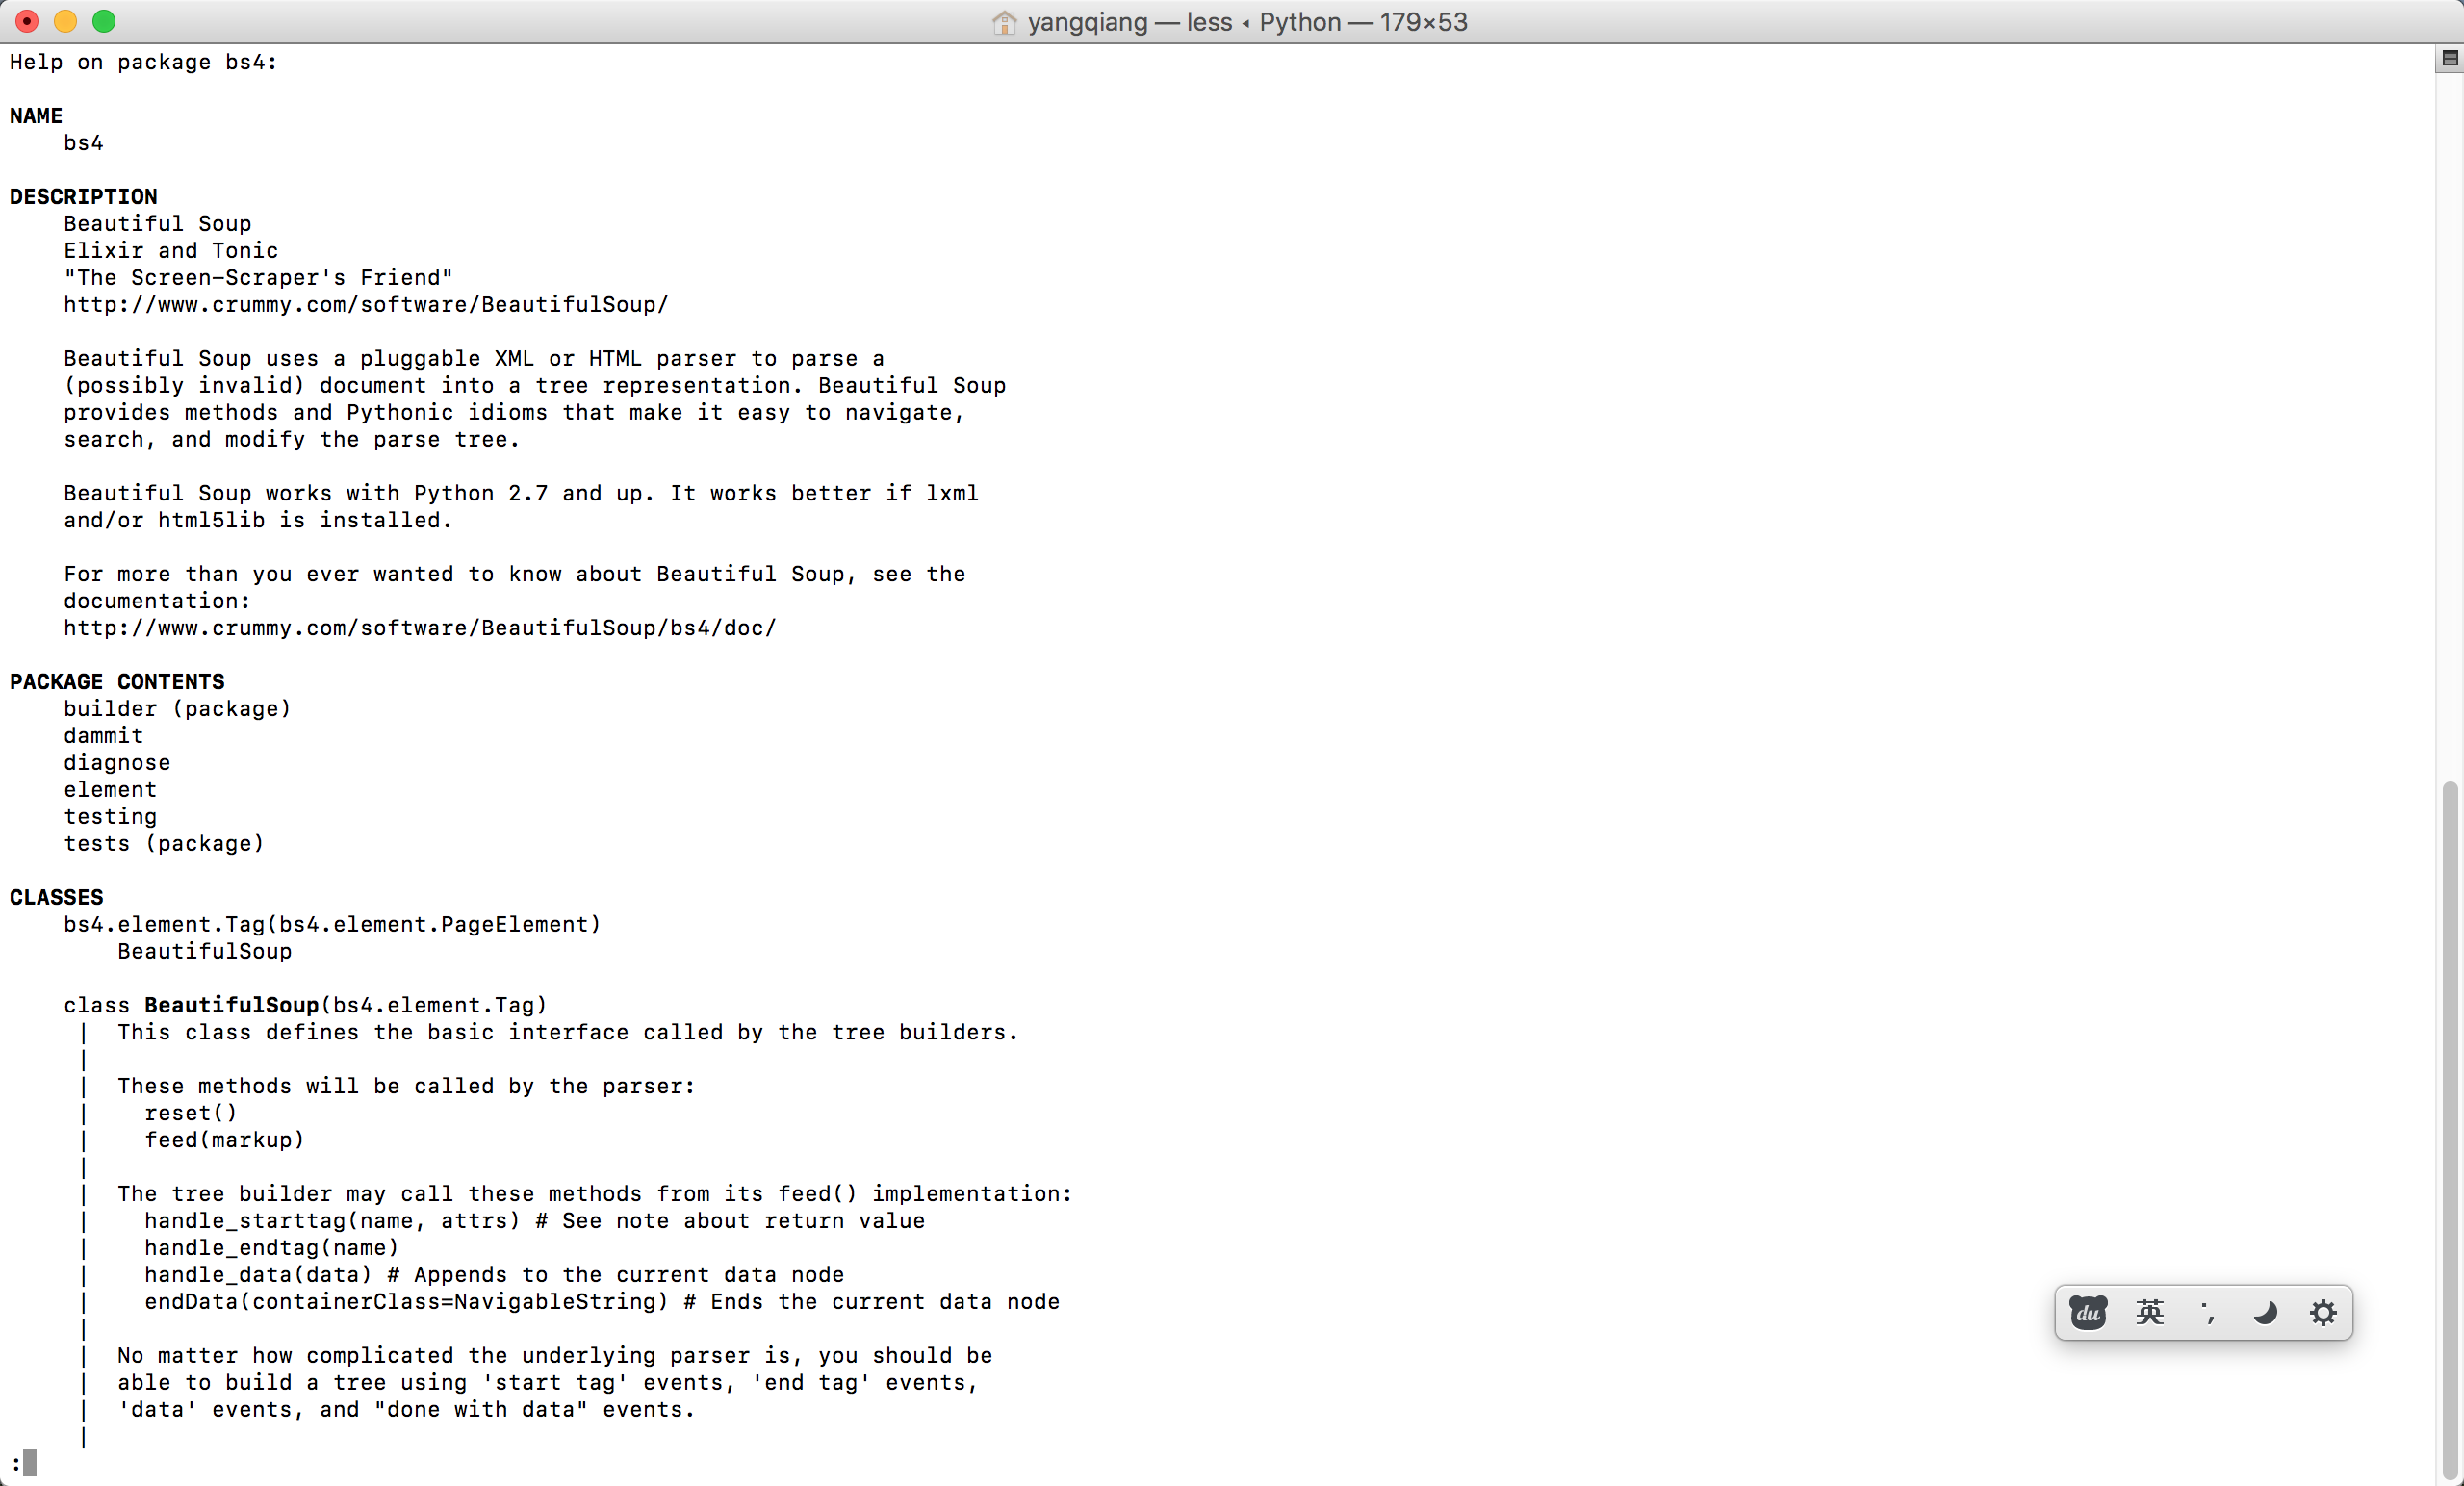

## BeautifulSoup对象构建

### BeautifulSoup构造器说明

```python

    __init__(self, markup='', features=None, builder=None, parse_only=None, from_encoding=None, exclude_encodings=None, **kwargs)
        |- markup：标记字符串，或者类似文件的对象，一般我们使用下载的页面字符串。
        |- features：解析的方式
                |- "lxml"
                |- "lxml-xml"
                |- "html.parser"       # 一般我们使用这种解析HTML
                |- "html5lib"
                |- "html"
                |- "html5"
                |- "xml")
        

```

### 构建对象

```python

import requests
import bs4



def crawl_one_page(page_no):
    url = 'https://ke.qq.com/course/list?mt=1001&st=2002&tt=3019&price_min=0&price_max=0&page=%d' % page_no
    session = requests.Session()
    response = session.get(url)
    
    if not response:
        return
    
    content_html = response.content.decode('utf-8')
    bs_content = bs4.BeautifulSoup(content_html, "html.parser")    #  <---对象创建

```

## BeautifulSoup的节点管理属性

1. BeautifulSoup类型说明：
    - BeautifulSoup 就从Tag继承的，上面介绍的方式在Tag都有用。
        - |      BeautifulSoup
        - |      bs4.element.Tag
        - |      bs4.element.PageElement
        - |      builtins.object

- BeautifulSoup的节点数据管理，常见属性都是与HTML或者XML的DOM有关系。
    - children          # 所有的子节点
    - descendants   # 所有后代节点
    - next               # 下一个节点
    - nextSibling      # 下一个节点 
    - next_elements   # 下一个元素
    - next_siblings     # 后面兄弟节点
    - parents            # 父节点
    - previous           # 前一个节点
    - previousSibling     # 前一个兄弟节点
    - previous_elements   # 前一个元素节点
    - previous_siblings      # 前面的兄弟节点
    
    - isSelfClosing          # 单元素节点
    - is_empty_element     # 同上
    - parserClass              # 解析类
    - string                      # 字符串格式的数据
    - stripped_strings        # 去空的字符串数据
    - text                        # 节点值

- 属性使用

```python

for item_ in bs_content.children:
    print(type(item_))

```

- 输出的主要数据类型：

```python

    <class 'bs4.element.NavigableString'>
    <class 'bs4.element.Doctype'>
    <class 'bs4.element.NavigableString'>
    <class 'bs4.element.Tag'>
    <class 'bs4.element.NavigableString'>
    <class 'bs4.element.NavigableString'>
    <class 'bs4.element.Tag'>
    <class 'bs4.element.Comment'>

```


## BeautifulSoup四大数据类型

### Tag数据类型

#### Tag的属性

- Tag 表示HTML或者XML的标签，Tag有两个重要的属性：
    - name 
    - attrs
    
- 其他重要属性，可以从构造器得知
    - builder
    - parser
    - namespace
    - prefix
    - parent
    - previous
    - is_xml
    
- 从源代码知道，节点的内容属性
    - contents

```python
    __init__(self, parser=None, builder=None, name=None, namespace=None, prefix=None, attrs=None, parent=None, previous=None, is_xml=None)
     |      Basic constructor.
```

2 . Tag属性使用例子

```python
    print(bs_content.name)
    print(bs_content.attrs)
    print(bs_content.builder)
    print(bs_content.namespace)
    print(bs_content.prefix)
    print(bs_content.parent)
    print(bs_content.previous)
    print(bs_content.is_xml)
    print(bs_content.contents)
```

#### tag的访问

- tag的访问方式很多种
    - 使用节点管理属性遍历得到，比如使用children属性访问。（比较麻烦，不推荐）
    - 使用find函数得到（后面介绍）
    - 使用select函数得到（后面介绍）
    - 成员方式，使用节点name作为属性访问。

- tag的属性访问方式：
    Tag.name
    
```
    print(bs_content.html.body.section.div.div)
```

- 上面html是bs_content的节点，body是html的节点，依次类推。

#### tag的属性访问

- tag的属性访问方式有：
    - 使用attrs属性访问；
    - 使用get方法访问；
    - 使用下标\[  \] 运算符

```python

    print(bs_content.html['lang'])
    print(bs_content.html.attrs)
    print(bs_content.html.get('lang'))

```


- 上述的下标运算，还可以修改属性，释放属性。


### NavigableString数据类型

- NavigableString类型主要就是标签内部的文本内容；

- NavigableString访问方式
    - 使用string属性
    
```
    print('节点:', bs_content.html.body.section.div.h1)
    print('string:', bs_content.html.body.section.div.h1.string)
    print('text:', bs_content.html.body.section.div.h1.text)

    print('节点:', bs_content.html.body.section.div.div.a)
    print('string:', bs_content.html.body.section.div.div.a.string)
    print('text:', bs_content.html.body.section.div.div.a.text)

```

- 运行结果：

```python

节点: <h1 class="hidden-clip">Python在线培训视频教程_编程语言_IT·互联网</h1>
string: Python在线培训视频教程_编程语言_IT·互联网
text: Python在线培训视频教程_编程语言_IT·互联网
节点: <a class="mod-breadcrumbs__nav" href="/course/list?mt=1001" report-tdw="module=hotword&amp;action=filter&amp;platform=1&amp;ver1=1001" title="IT·互联网">
                IT·互联网 <i></i>
</a>
string: None
text: 
                IT·互联网 



```


- 说明：
    - string得到NavigableString；当节点的内容包含其他子节点，string返回None，但text总是返回其中的文本。
    - text返回的string类型；

### Comment数据类型

- Comment表示注释，访问Comment使用string得到，但string不包含注释符号，这样容易与NavigableString混淆，可以判定类型来区分。使用string得到值。
    - | - name属性
    - | - string属性 

```python

    if type(节点.string)==bs4.element.Comment:

```

- 一个例子
```python
for item_ in bs_content.children:
    if type(item_) == bs4.element.Comment:
        print(dir(item_))
        print(item_.name, item_.string)
        break
```

### Doctype数据类型

- 一个HTML最多一个Doctype类型；也是特殊的Doctype，使用不多，一般包含如下几个属性：
    - name,
    - string

```python

    for item_ in bs_content.children:
        if type(item_) == bs4.element.Doctype:
            print(item_.name, item_.string)
```

## 节点查询-find与find_all

###  find与find_all函数说明
1. find:
    - 返回找到的第一个元素
    
```python

    find(self, name=None, attrs={}, recursive=True, text=None, **kwargs)
        |- find的参数都是查询的条件。
            |- name ： 节点名
            |- attrs={} ： 节点的属性
            |- recursive：是否递归，还是只对当前节点子阶段查找
            |- text ： 节点的文本值
```

2. findAll：
    - 返回所有找到的元素：

```python

    find_all(self, name=None, attrs={}, recursive=True, text=None, limit=None, **kwargs)
        参数与find一样，因为find_all返回所有结果，为了效率，提供limit参数限制查询的数量，当查询结果满足数量，终止查询。

```

3. find与find_all的返回类型

    - find_all返回的类型：`bs4.element.ResultSet`
    - find返回的类型是：`bs4.element.Tag`
    
4. find与find_all的函数别名：
    - `findChild` = find(self, name=None, attrs={}, recursive=True, text=None, **kwargs)
    - `findChildren` = find_all(self, name=None, attrs={}, recursive=True, text=None, limit=None, **kwargs)


### find与find_all 的查询条件

- 因为find与find_all仅仅返回结果不同，功能行为完全相同，下面使用find_all来作为例子说明, 并且使用腾讯课堂的url作为例子：
    - url：`https://ke.qq.com/course/list?mt=1001&st=2002&tt=3019&price_min=0&price_max=0&page=1`


1. 全部查找

```python

    list_course = bs_content.find_all()

```

2. 根据name查找

```python

    list_course = bs_content.find_all(name='div')

```

3. 根据attr查找

```python

    list_course = bs_content.find_all(attrs={'class':"main autoM clearfix"})

```

4. 根据text查找

```python

    list_course = bs_content.find_all(text='马哥教育')

```

- 注意：有的文本不是很规范，两边存在空格换行之类的。

```python

list_course = bs_content.find_all(text='''
                609人最近报名
            ''')

```

5. 根据多个条件同时查找

```python

    list_course = bs_content.find_all(
        name='a',
        attrs={'class': "item-source-link"},
        text='马哥教育'
    )

```

### ResultSet的使用

- ResultSet的继承结构
    - |      ResultSet
    - |      builtins.list
    - |      builtins.object
    
- 本质是list，list中的元素还是Tag。

### name与attrs参数的多重使用形式

- The value of a key-value pair in the 'attrs' map can be a **string**, **a list of strings**, **a regular expression object**, or **a callable** that **takes a string** and **returns whether or not the string matches for some custom definition of 'matches'**. The same is true of the tag name.

- name参数与attrs参数的值可以使用的形式：
    - 字符串（最自然的方式，前面就是这样使用的）
    - 字符串列表
    - 正则表达式对象
    - 可调用函数（参数一个，类型是字符串，返回值是逻辑值，决定是否被选择）

#### 字符串列表

1. name = \['div', 'a', ....\]
    - 同时选择多个节点
2. attrs = {'节点属性':  \['value1', 'value2', ...... \]}
    - 同时判定多个属性

3. 例子：


```python
    results = bs_content.find_all(
        name=['div', 'a'],
        attrs={'class': ['market-bd market-bd-6 course-list course-card-list-multi-wrap js-course-list',
                         'item-source-link']}
    )
```

#### 正则表达式对象

- 必须使用正则表达式对象，不能使用正则表达式列表。


1. name =  re.compile(r'正则表达式')
    - 匹配正则表达式满足的节点。
    
2. attrs = {'节点属性': re.compile(r'正则表达式')}
    - 匹配节点属性满足正则表达式的节点。
    

3. 例子：

```python

results = bs_content.find_all(
    name=re.compile(r'\w{3}'),
    attrs={'class': re.compile(r'\w{10,}')}
)
print(len(results))

```
- 说明：
    - 上面例子选择节点名包含3隔字符，属性class至少10隔字符以上的节点。

#### 可调用函数

1. name = 函数名
    - 如果函数返回True，就返回节点；返回False，节点就被过滤掉。
    
2. attrs = {'节点属性': 函数名}
     - 如果函数返回True，就匹配属性；返回False，具有这个属性值得节点就被过滤掉。
     
     
3. 例子：


```python

    def node_func(value):
        # print('节点:', type(value))
        if value.name == 'div' or value.name == 'a':
            return True
        else:
            return False


    def attr_func(value):
        # print('属性:', type(value), value)
        if value == 'market-bd':
            return True
        return False


    results = bs_content.find_all(
        name=node_func,
        attrs={'class': attr_func}
    )
    print(len(results))

```

- 说明：
    - 上面例子匹配div与a节点，并且class属性中包含market-bd值。
    - class属性函数对class的属性的每个值都会调用。

### keyword参数

1.  如果使用keyword，则默认是属性
    - class属性与关键字class冲突，使用class_，其他冲突关键字一次类推。
    
```python

    results = bs_content.find_all(class_='item-source-link')
    print(len(results))

```


2. keyword参数指定属性，也可以使用字符串列表与可调用函数。


```python

    soup.find_all(href=re.compile("\w{3}"), id='button')

```

## 选择器查找-select与select_one

### select函数说明


1. 函数说明：

```python

    select(self, selector, _candidate_generator=None, limit=None)
        |- selector : 样式选择器
        |- _candidate_generator：候选生成器，用来替代默认的节点搜索(选择器只在生成器产生的节点中选择)
        |- limit：限制返回的节点数

```

2. 使用例子代码


```python

def div_candidate_generator(tag):
    print(tag.name)
    print(len(list(tag.descendants)))
    for item_ in tag.descendants:
        if isinstance(item_, bs4.element.Tag):
            yield item_


result = bs_content.select(
    selector='div > div',
    _candidate_generator=div_candidate_generator,
    limit=300)
print(len(result))

```


### select的选择器使用方式

- select使用的选择器遵循CSS选择器规则
    - 标签名
    - id选择器
    - class选择器
    - \*通配符
    - 属性选择器
    - 组合选择器
    - 伪类选择器

#### 基本选择器

1. 标签选择器
    - 表签名
    
    
    
- 例子代码

```python
    result = bs_content.select('span')
    print(len(result))
```

- 说明：
    - 返回所有span节点元素

2. id选择器
    - #id值
    
    
- 例子代码

```python
    result = bs_content.select('#js_main_nav')
    print(len(result))
```

- 说明：
    - 选择id值为`js_main_nav`的节点元素。

3. class选择器
    - .class属性值
    

- 例子代码

```python

    # 实际的属性是多个值： main autoM clearfix：原始节点是：<section class="main autoM clearfix">
    result = bs_content.select('.main')
    print(len(result))
```

- 说明：
    - 返回class属性值有main的节点元素。


4. \*通配选择
    - 直接使用\*，表示选择所有标签，在组合选择器中也可以使用。
    

- 例子代码

```python

    result = bs_content.select('*')
    print(len(result))

```

- 说明：
    - 选择所有节点

####  属性选择器

- 属性选择器有如下几种形式：
    - \[属性\]：选择具有属性的节点。
    - \[属性 = 值\]：选择属性具有属性值的节点
    - \[属性 ~= 值\]：选择属性的属性值包含指定值的节点
    - \[属性 |= 值\]：选择属性的属性值以指定值开头的节点
    
- 还有其他扩展的属性值，可以参考更加全的CSS选择器。



- 例子代码

```python

    # 所有具有type属性的节点
    result = bs_content.select('[type]')
    print(len(result))
    # 选择属性type=text/javascript的节点
    result = bs_content.select('[type=text/javascript]')
    print(len(result))
    # 属性class中含有main单词的节点
    result = bs_content.select('[class~=main]')
    print(len(result))
    # 选择type属性以text开头所有节点
    result = bs_content.select('[type|=text]')
```


#### 组合选择器

- 组合选择器有多种
    - 节点与节点组合
    - 节点与属性组合
    - 其他组合方式

1. 节点与节点组合
    - element1, element2	 ：选择节点element1与element2
    - element1   element2	 ：选择element1内部的element2节点	
    - element1 > element2	：选择element1的所有element2子节点
    - element1 + element2   ：选择element1后面的element2节点（紧邻）
    

- 例子代码

```python
    # 选择节点section与div
    result = bs_content.select('section,div')
    print(len(result))
    # 选择节点section内的所有div节点
    result = bs_content.select('section div')
    print(len(result))
    # 选择节点section的div子节点
    result = bs_content.select('section > div')
    print(len(result))
    # 选择节点section后的div节点
    result = bs_content.select('header + section')
    print(len(result))
```

2. 节点与属性组合
    - element\[属性\]
    - element\[属性 = 值\]
    - element\[属性 ~= 值\]
    - element\[属性 |= 值\]
    
    
- 例子代码：

```python

    # 所有具有type属性的script节点
    result = bs_content.select('script[type]')
    print(len(result))
    # 选择属性type=text/javascript的script节点
    result = bs_content.select('script[type=text/javascript]')
    print(len(result))
    # 属性class中含有main单词的section节点
    result = bs_content.select('section[class~=main]')
    print(len(result))
    # 选择class属性以topic开头所有section节点
    result = bs_content.select('section[class|="topic"]')
    print(len(result))

```

3. 混合组合方式
    - 上面的所有选择器都可以作为节点使用


```python

    result = bs_content.select('section > div > div[class~="course-list"]')
    print(len(result))
    for item_ in result:
        print(item_.attrs)

    result = bs_content.select('section > div > [class~="course-list"]')
    print(len(result))
    for item_ in result:
        print(item_.attrs)

    result = bs_content.select('section > div > .market-bd-6')
    print(len(result))
    for item_ in result:
        print(item_.attrs)

```

- 运行结果

```python

1
{'class': ['market-bd', 'market-bd-6', 'course-list', 'course-card-list-multi-wrap', 'js-course-list'], 'data-report-module': 'middle-course'}
1
{'class': ['market-bd', 'market-bd-6', 'course-list', 'course-card-list-multi-wrap', 'js-course-list'], 'data-report-module': 'middle-course'}
1
{'class': ['market-bd', 'market-bd-6', 'course-list', 'course-card-list-multi-wrap', 'js-course-list'], 'data-report-module': 'middle-course'}


```

#### 伪类选择器

- 目前bs4没有实现伪类选择器，大家在使用诶时候，一定需要明确。

```python
    result = bs_content.select('body > section > div > div:nth-child(2)')
    print(len(result))
```

- 说明：
    - 上面代码抛出异常：`NotImplementedError: Only the following pseudo-classes are implemented: nth-of-type.`
